### Import Libraries

In [1]:
from utils import *
from env import EggsHuntEnv
from algs_dp import *
from algs_td import *
from algs_vfa import *
from algs_mc import *
from algs_dqn import *
from alg_ac import *

### Set up the env

We decided to use just two rooms for training bacause it was the best way to show the state action value heatmap in a clear way. 
Uncommenting the lines the number of rooms can increase

In [2]:
 # Maximum number of eggs for each room
n_eggs_list =     [5,    2 ,   #4 , 7, 6,
                  ]
# Number of rooms
n_rooms = len(n_eggs_list)  

# Initial probabilities to find an egg for each room
initial_p_list =  [0.8,  0.3 , #0.5, 0.9, 0.6
                  ]

# Decay probability rates for each room
decay_rate_list = [0.8,  0.9  , #0.7, 0.6, 0.4
                  ]

GAMMA = 0.9

ALPHA = 0.1

# create the environment
transition_probabilities, states, actions, total_eggs = create_environment(n_rooms, n_eggs_list, initial_p_list, decay_rate_list)

# initialize the environment
env = EggsHuntEnv(states, actions, transition_probabilities, total_eggs)

env.reset()
print(f'Number of states: {env.num_states}')

print('Terminal states:')
for state in env.states:
    if env.is_terminal_state(state):
        print(env.get_state_name(state))

print('==================')
print('Possbile actions:')
for action in env.actions:
    print(env.get_action_name(action))

Number of states: 36
Terminal states:
('Room 1', 5, 2)
('Room 2', 5, 2)
Possbile actions:
search
stay
go_to_room_1
go_to_room_2


## 1. Dynamic Programming

In [3]:
random_policy = create_random_policy(env)
random_policy[:3]

array([[0.33333333, 0.33333333, 0.        , 0.33333333],
       [0.33333333, 0.33333333, 0.        , 0.33333333],
       [0.33333333, 0.33333333, 0.        , 0.33333333]])

#### policy evaluation

In [4]:
V = policy_evaluation(env, policy=random_policy, gamma=GAMMA, threshold=0.001, verbose=True)

State-value function is evaluated after 45 steps.
State-value function: [ 9.22537466  7.97423211  4.90255005  6.63411334  5.42118171  2.43166557
  4.35491433  3.2201573   0.4247307   2.21265686  1.24745622 -1.03598015
 -0.26808159 -0.85070874 -1.60669821 -4.71945381 -4.46160425  0.
  7.03787165  5.33913376  1.17797713  5.10167429  3.4346982  -0.67525516
  3.40752706  1.80830657 -2.18064082  1.83594127  0.39320078 -3.27646413
  0.06333146 -0.98779114 -3.7048218  -2.96119568 -2.61617159  0.        ]


In [5]:
for i, value in enumerate(V[:20]):
    print(f'{env.get_state_name(i)}: {value:.1f}')

('Room 1', 0, 0): 9.2
('Room 1', 0, 1): 8.0
('Room 1', 0, 2): 4.9
('Room 1', 1, 0): 6.6
('Room 1', 1, 1): 5.4
('Room 1', 1, 2): 2.4
('Room 1', 2, 0): 4.4
('Room 1', 2, 1): 3.2
('Room 1', 2, 2): 0.4
('Room 1', 3, 0): 2.2
('Room 1', 3, 1): 1.2
('Room 1', 3, 2): -1.0
('Room 1', 4, 0): -0.3
('Room 1', 4, 1): -0.9
('Room 1', 4, 2): -1.6
('Room 1', 5, 0): -4.7
('Room 1', 5, 1): -4.5
('Room 1', 5, 2): 0.0
('Room 2', 0, 0): 7.0
('Room 2', 0, 1): 5.3


#### policy improvement

In [6]:
policy, Q = policy_improvement(env, V, gamma=GAMMA, verbose=False)

#### policy iteration

In [7]:
policy_dp, V, Q_dp = policy_iteration(env, gamma=GAMMA, threshold=0.001, verbose=False)
V

array([30.26441909, 29.17797415, 28.3644854 , 23.91304622, 22.67508484,
       21.74844964, 18.2042052 , 16.75076433, 15.66311692, 13.16226565,
       11.39296435, 10.06917889,  8.82513738,  6.57558322,  4.892634  ,
        5.26613558,  2.25363959,  0.        , 26.23797718, 25.26017674,
       24.52803686, 20.5217416 , 19.40757635, 18.57360467, 15.38378468,
       14.0756879 , 13.09680523, 11.13000234,  9.32683241,  8.062261  ,
        8.72174006,  6.02627105,  3.4033706 ,  6.96238679,  3.6151569 ,
        0.        ])

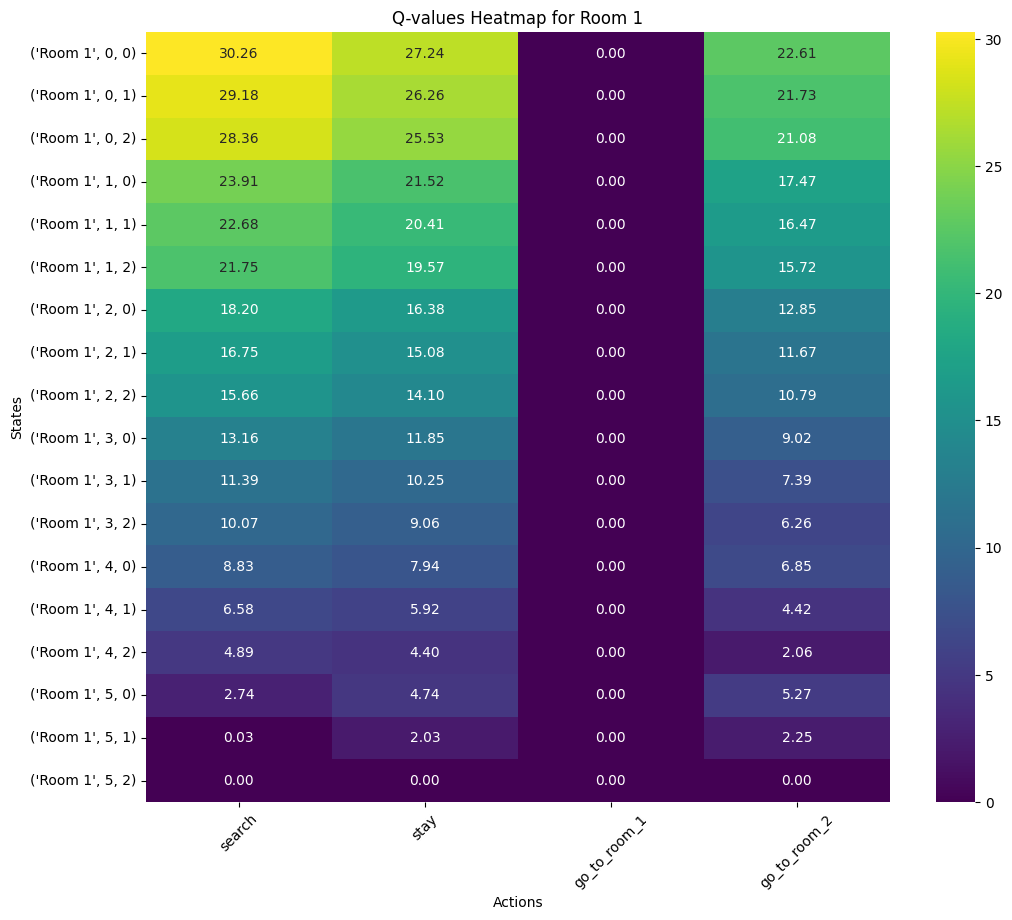

In [8]:
room_dfs = create_q_dataframe_for_rooms(env, Q_dp)
plot_heatmap_q(room_dfs, "Room 1")

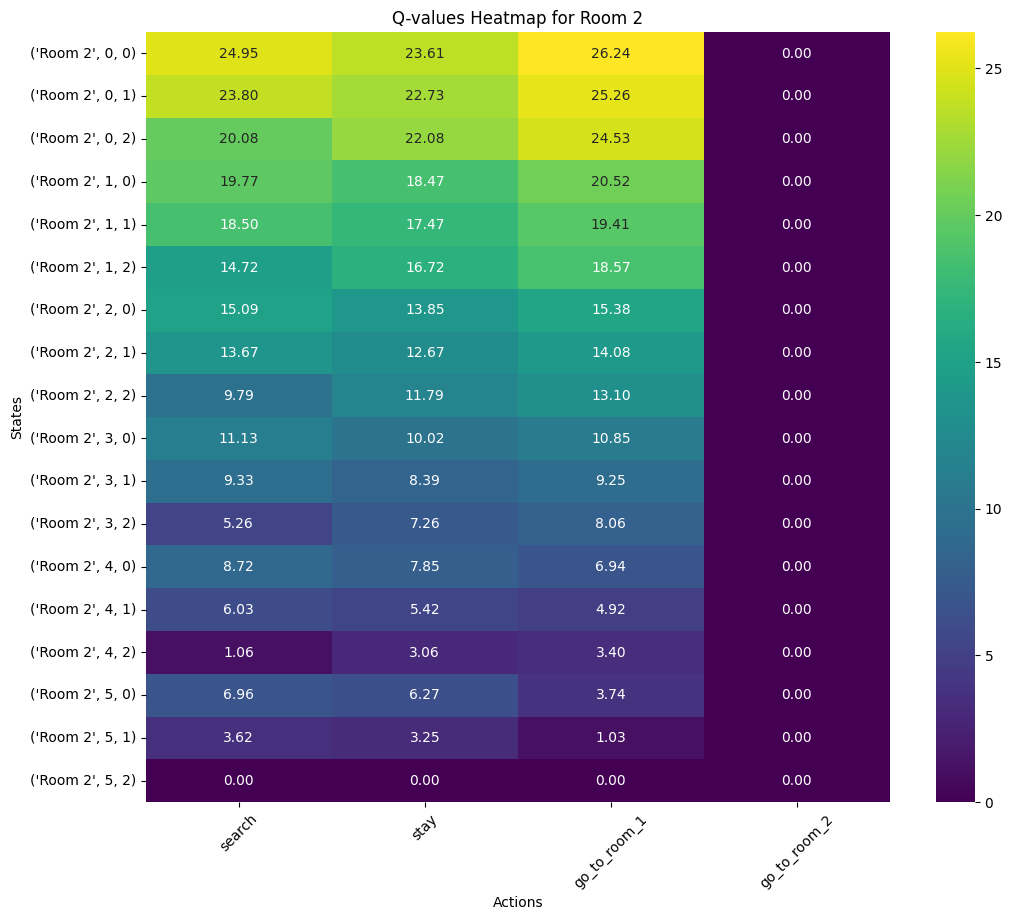

In [9]:
room_dfs = create_q_dataframe_for_rooms(env, Q_dp)
plot_heatmap_q(room_dfs, "Room 2")

From these heatmaps we can see that if you find yourself in room1 is generally better to explore the room. The only exception is when you already have the maximum number of eggs for the room1, in this case you should change room.
If you find yourself in room 2, in general you should chamge room. In some cases, if you already have 3 eggs in room one, you may explore room 2.

#### value iteration

In [10]:
policy, V = value_iteration(env, gamma=GAMMA, threshold=0.001, verbose=False)
V

array([30.26442141, 29.17797647, 28.3644854 , 23.9130476 , 22.67508622,
       21.74844964, 18.20420588, 16.75076501, 15.66311692, 13.1622659 ,
       11.3929646 , 10.06917889,  8.82513743,  6.57558327,  4.892634  ,
        5.26613558,  2.25363959,  0.        , 26.23797927, 25.26017883,
       24.52803686, 20.52174284, 19.4075776 , 18.57360467, 15.38378529,
       14.07568851, 13.09680523, 11.13006295,  9.32684087,  8.062261  ,
        8.72174006,  6.02627105,  3.4033706 ,  6.96238679,  3.6151569 ,
        0.        ])

## 2. Monte Carlo

In [11]:
env.reset()

0

In [12]:
optimal_policy, Q_mc= MC_onpolicy(env, policy=None, eps=0.01, num_timesteps=500, num_iterations=1000)

In [13]:
optimal_policy

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [14]:
Q_mc

array([[ 3.89457769e+01,  1.06037736e+01,  0.00000000e+00,
         1.83333333e+00],
       [ 3.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.03500000e+02, -2.39000000e+02,  0.00000000e+00,
         0.00000000e+00],
       [-6.24666667e+01, -8.62500000e+00,  0.00000000e+00,
         3.14111349e+01],
       [ 3.13627797e+01,  2.91250000e+01,  0.00000000e+00,
         2.50000000e+01],
       [-1.13500000e+02, -1.00000000e+00,  0.00000000e+00,
        -1.00000000e+00],
       [-1.68000000e+02, -1.91250000e+01,  0.00000000e+00,
        -1.93333333e+01],
       [ 2.28750000e+01,  2.04347826e+00,  0.00000000e+00,
         9.84615385e+00],
       [-1.21500000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-3.02666667e+02, -4.03333333e+01,  0.00000000e+00,
        -1.36000000e+02],
       [ 1.52160194e+01,  7.00000000e+00,  0.00000000e+00,
         1.87500000e+00],
       [-1.27500000e+02, -8.20000000e+01,  0.00000000e+00,
      

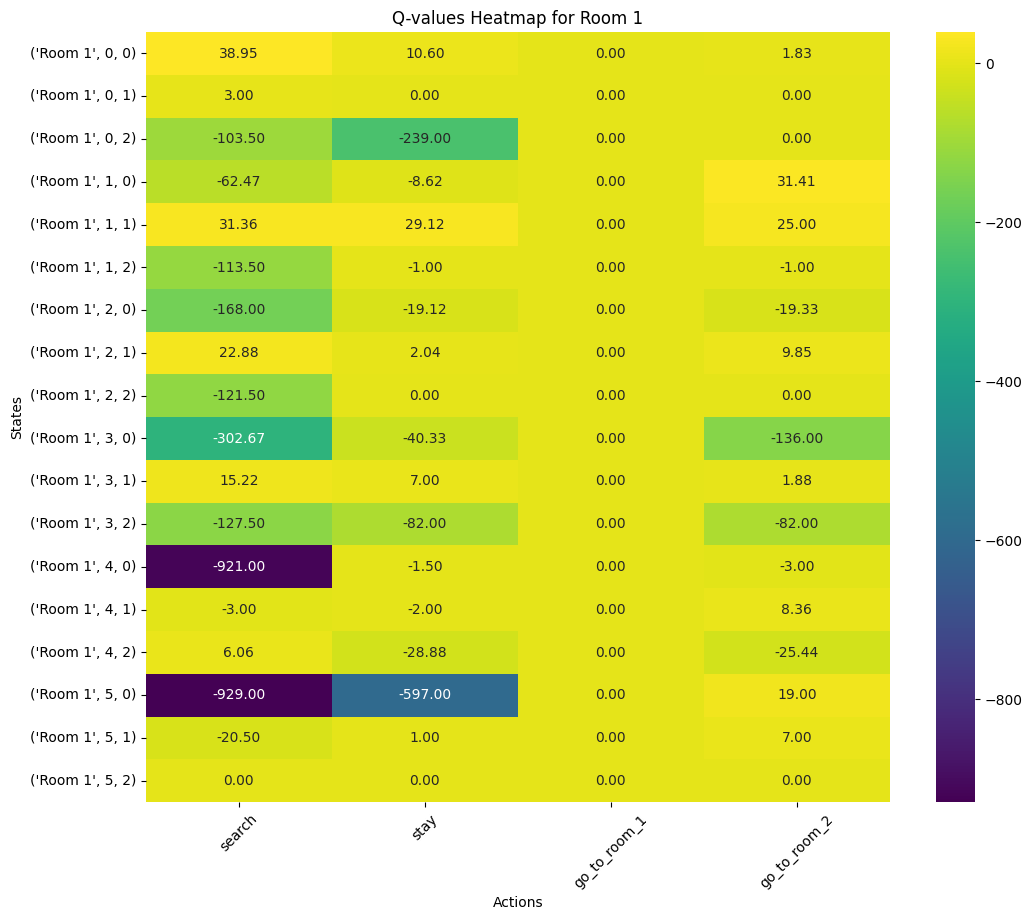

In [15]:
room_dfs = create_q_dataframe_for_rooms(env, Q_mc)
plot_heatmap_q(room_dfs, "Room 1")

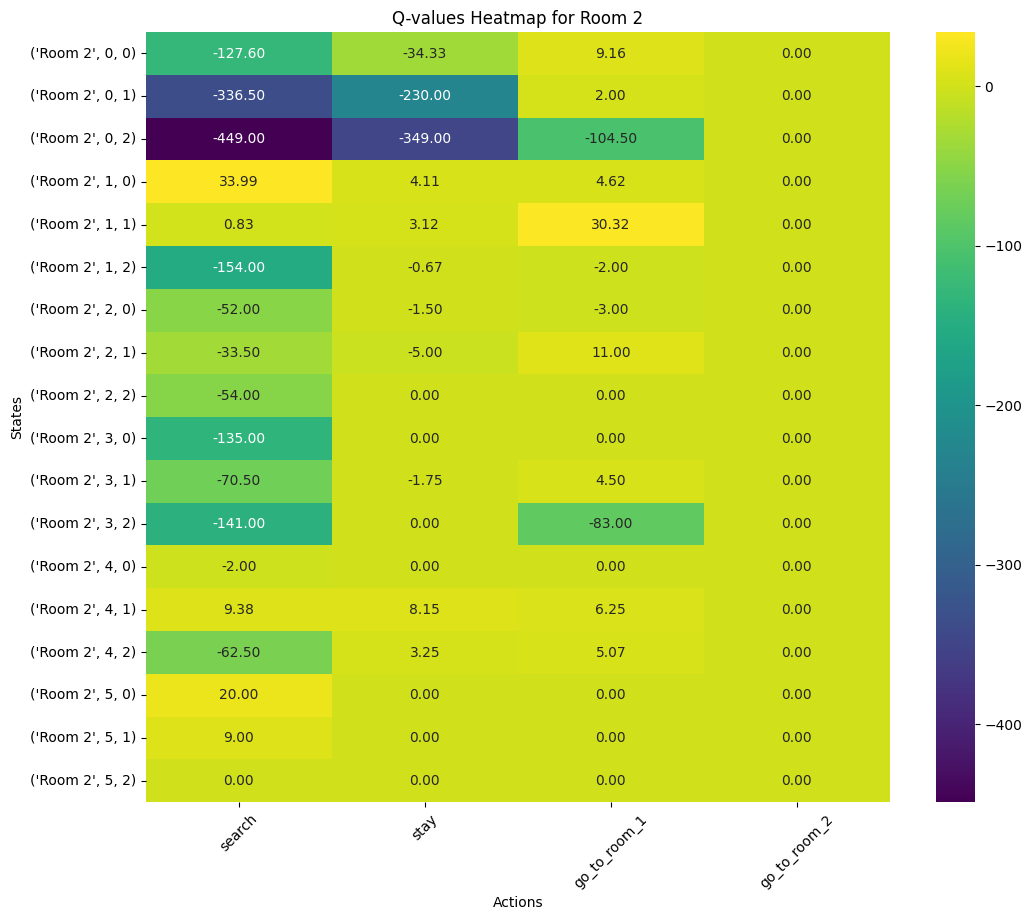

In [16]:
room_dfs = create_q_dataframe_for_rooms(env, Q_mc)
plot_heatmap_q(room_dfs, "Room 2")

From the tables above we can immediatly notice that some actions are really bad to take in certain states.
As before, if you are in room 1 it's better to explore, with the exception of the states in which you already have all the eggs in room 1. In other few cases seems better to change room.
If you are in room 2 it's better to go in room 1 until you have less then 3 eggs in room 1, otherwhise you should explore.

## 3. TD

In [17]:
env.reset()

0

In [18]:
Q = temploral_difference_policy_evaluation(env, policy=random_policy, n_steps=100000, gamma=GAMMA, alpha=ALPHA)

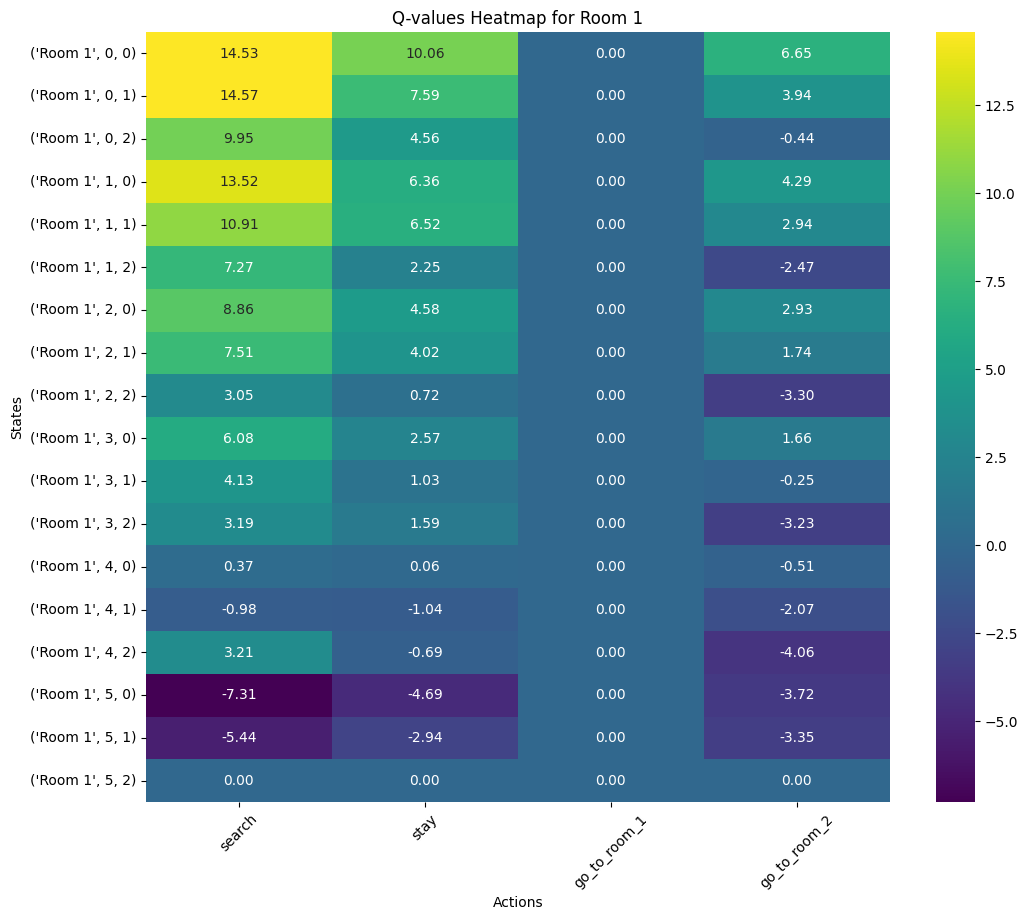

In [19]:
# EVALUATION OF A RANDOM POLICY
room_dfs = create_q_dataframe_for_rooms(env, Q)
plot_heatmap_q(room_dfs, "Room 1")

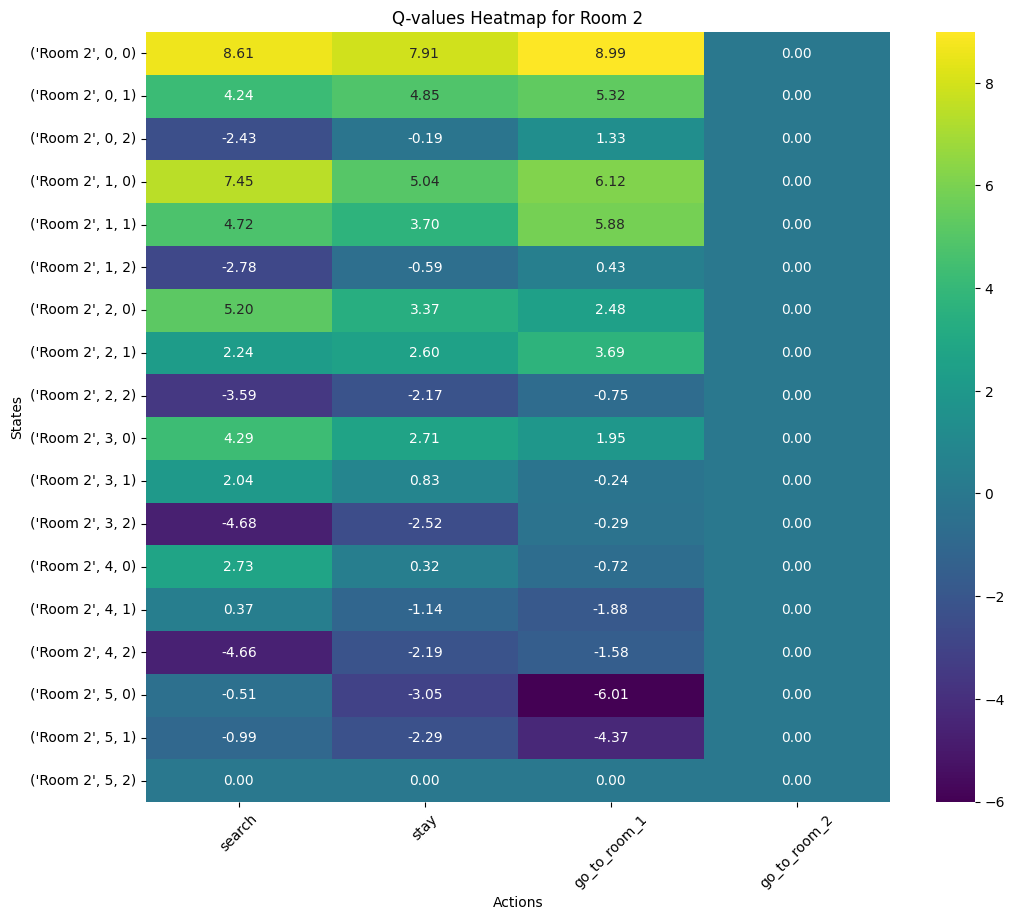

In [20]:
room_dfs = create_q_dataframe_for_rooms(env, Q)
plot_heatmap_q(room_dfs, "Room 2")

In this case we see that for room 1 behave exactly the same as before, while for room 2 in this case is preferable to explore

In [21]:
num_runs = 3
n_steps =  100000
Q_list = []
for n in range(num_runs):
    optimal_policy, Q = sarsa(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.01, verbose=False)
    Q_list.append(Q)
Q_td_sarsa = np.array(Q_list).mean(axis=0)

In [22]:
policy_td_sarsa = compute_optimal_policy(env, Q_td_sarsa)

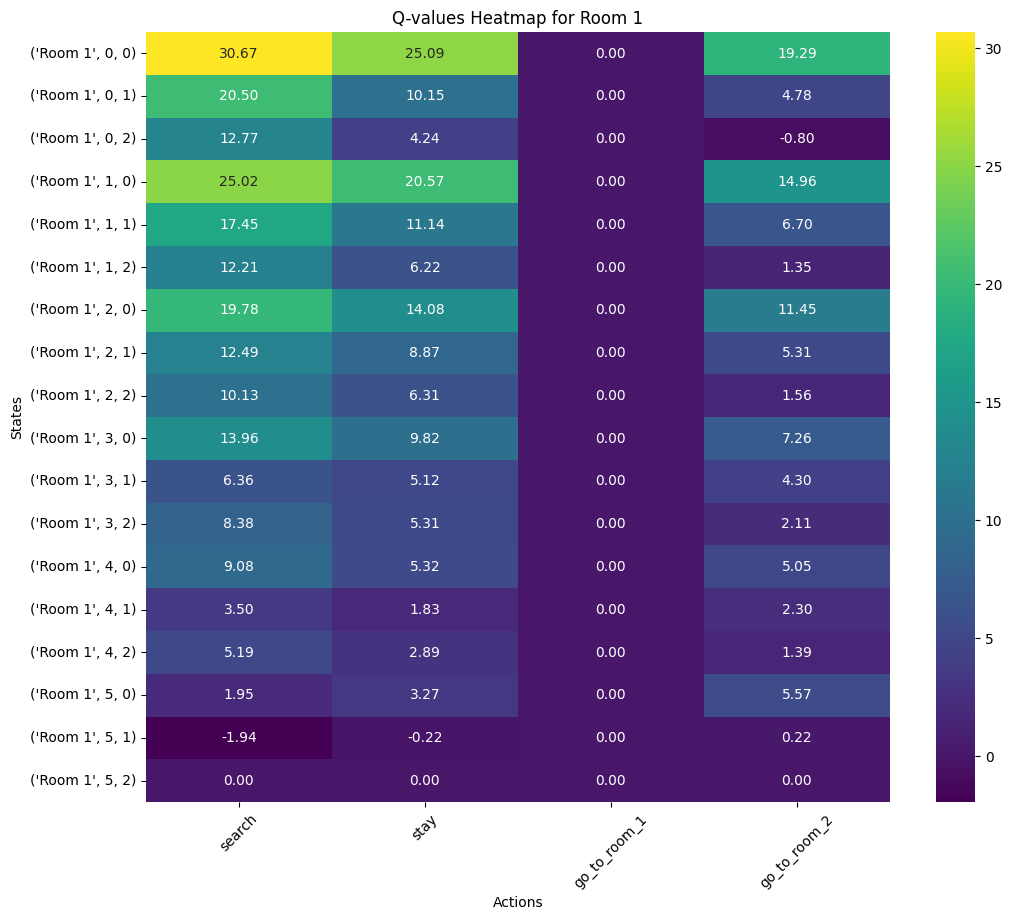

In [23]:
# EVALUATION OF OPTIMAL POLICY*
room_dfs = create_q_dataframe_for_rooms(env, Q_td_sarsa)
plot_heatmap_q(room_dfs, "Room 1")

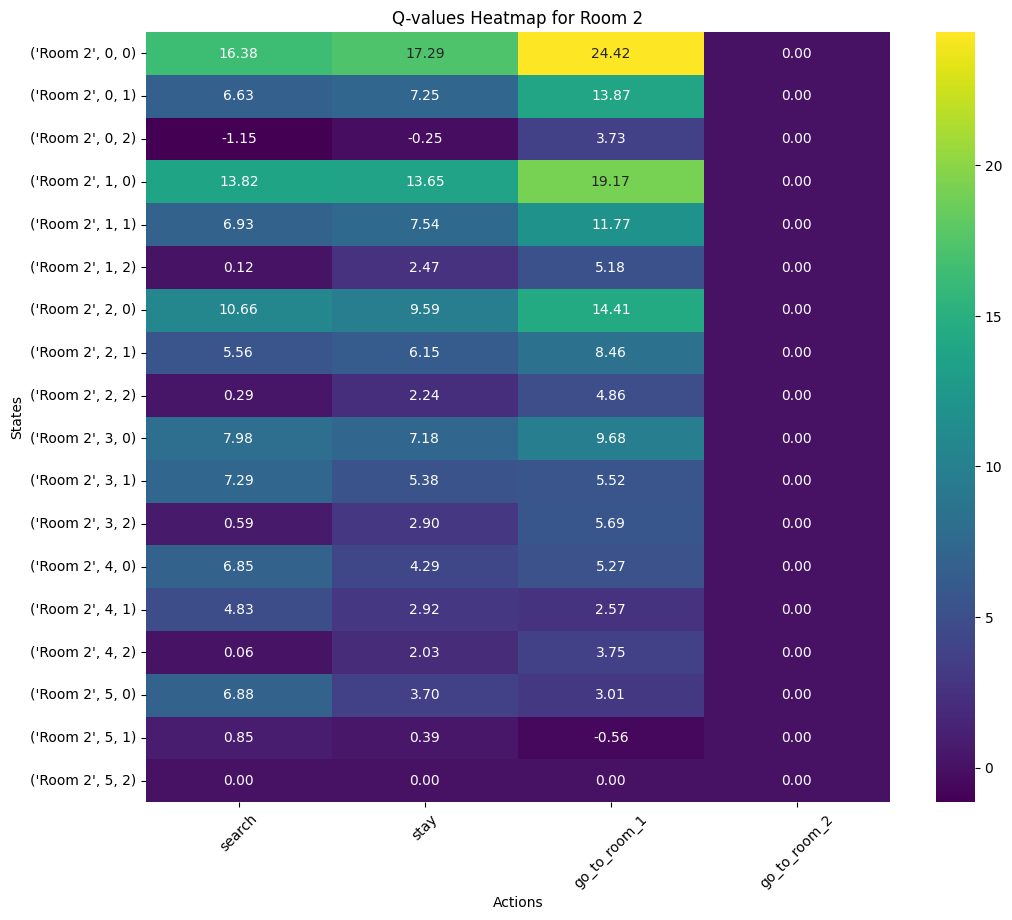

In [24]:
room_dfs = create_q_dataframe_for_rooms(env, Q_td_sarsa)
plot_heatmap_q(room_dfs, "Room 2")

From the tables above we can see that the behaviour for room 1 is the same ad DP and MC, for room 2 is similar, the only difference is that the exploration starts when in room 1 you have already 4 eggs.

In [25]:
# rough difference between Q sarsa and Q DP (sum over actions)
sum(Q - Q_dp)

array([-183.96028201, -212.21638957,  -80.52826534, -101.36490517])

In [26]:
n_steps = 100000
policy_td_q_learning, Q = q_learning(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.01, verbose=True)

Passed 0 steps.


## 4. VFA

In [27]:
env.reset()

0

In [28]:
feature_extractor  = FeatureExtractor(env)
feature_extractor.get_features_state_action(12, 3)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.57142857,
       0.        ])

In [29]:
feature_extractor  = FeatureExtractor(env)
#feature_extractor.get_features_state(12)
vfa = VFA(env, feature_extractor, alpha=ALPHA, gamma=GAMMA, epsilon=1)

#V_est = vfa.gradient_MC_policy_evaluation(n_episodes=11, policy=policy_dp)
#V_est = vfa.semi_gradient_TD_policy_evaluation(n_steps=11000, policy=policy_dp)
Q_vfa_sarsa = vfa.semi_gradient_sarsa(n_steps=200000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_sarsa = compute_optimal_policy(env, Q_vfa_sarsa)

In [30]:
Q_vfa_sarsa

array([[ 16.9104476 ,  15.08037097,   0.        ,  17.84532847],
       [ 12.79279153,  11.4146777 ,   0.        ,  14.11304199],
       [  8.67513546,   7.74898443,   0.        ,  10.38075551],
       [ 11.3420241 ,  10.75626458,   0.        ,  13.48838188],
       [  7.22436803,   7.09057131,   0.        ,   9.7560954 ],
       [  3.10671195,   3.42487804,   0.        ,   6.02380892],
       [  5.77360059,   6.43215819,   0.        ,   9.13143529],
       [  1.65594452,   2.76646492,   0.        ,   5.39914882],
       [ -2.46171155,  -0.89922835,   0.        ,   1.66686234],
       [  0.20517708,   2.10805179,   0.        ,   4.77448871],
       [ -3.91247899,  -1.55764148,   0.        ,   1.04220223],
       [ -8.03013506,  -5.22333475,   0.        ,  -2.69008425],
       [ -5.36324643,  -2.2160546 ,   0.        ,   0.41754212],
       [ -9.4809025 ,  -5.88174787,   0.        ,  -3.31474435],
       [-13.59855857,  -9.54744114,   0.        ,  -7.04703083],
       [-10.93166994,  -6

In [31]:
policy_vfa_sarsa

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [32]:
vfa = VFA(env, feature_extractor, alpha=ALPHA, gamma=GAMMA, epsilon=1)
Q_vfa_qlearning = vfa.semi_gradient_qlearning(n_steps=200000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_qlearning = compute_optimal_policy(env, Q_vfa_qlearning)

## Deep Q Learning

In [33]:
env.reset()

0

In [36]:
batch_size = 32
EPISODES = 2
num_iterations= 1000

In [37]:
Q=DQN_train(env, batch_size, EPISODES, num_iterations)

episode: 1/2, final step: 932, epsilon: 0.02


## Actor Critic

In [38]:
feature_extractor = 
p = actor_critic_algorithm(env, n_steps=10000, feature_extractor=feature_extractor, 
                       alpha_w=0.01, alpha_theta=0.005, alpha_r=0.005, verbose=False)

100%|██████████| 10000/10000 [00:10<00:00, 962.11it/s]


In [39]:
test_policy(env, p, n_episodes=100)

(31.6,
 {'Run 1': (26, 99),
  'Run 2': (32, 99),
  'Run 3': (28, 99),
  'Run 4': (40, 99),
  'Run 5': (24, 99),
  'Run 6': (32, 99),
  'Run 7': (34, 99),
  'Run 8': (34, 99),
  'Run 9': (34, 99),
  'Run 10': (32, 99)})